# Masterclass Belle II

In diesem *jupyter*-notebook werden dir die Grundlagen für die Rekonstruktion von Teilchen erklärt. Das ganze ist in *python(3)* programmiert und interaktiv gestaltet.

---
# 1. Grundlegendes <a id='Sec:basics'> </a> 
---
## 1.1 Bedienung <a id='SubSec:jupyter'> </a>
---

Die Umgebung, in der du hier arbeitest, wird als *jupyter notebook* bezeichnet. *jupyter notebooks*
kombinieren erklärende Texte, Bilder, interaktive Elemente und kleine Programme in einer Datei.

Diese Datei ist in *Zellen* strukturiert. Welche Zelle gerade ausgewählt ist, erkennst du am blauen Balken links. 
Jede dieser Zellen enthält entweder ein kleines Programm oder Text und Bilder, die deine nächste Aufgabe erklären.
Zelle mit Programmen erkennst du an einer Nummerierung links und dem grauen Hintergrund. Die Programme in diesen Zellen kannst du mit dem Play-Button in der Bedienleiste oben, oder mit `Umschalt`+ `Enter` ausführen.

<div class="alert alert-info">
<strong>Aufgabe:</strong>
Führe das Program in der Zelle unten aus. Es wird dir den Text `Hello World` direkt darunter ausgeben.

In [1]:
print("Hello World!")

Hello World!


Das Notebook hier ist in *python* programmiert und interaktiv gestaltet, so dass du nichts programmieren musst. Falls etwas nicht funktionieren sollte, frage uns einfach.

---
## 1.2 Notebook aufsetzen <a id='Sec:notebook'> </a> 
---

Im folgenden werden Funktionen importiert die für dieses Notebook notwendig sind. Die genaue Bedeutung der einzelnen Befehle soll an dieser Stelle nicht weiter wichtig sein. Ausgeführt werden muss die Zelle aber auf jeden Fall, da sonst spätere Teile nicht funktionieren.
widgets und matplotlib werden für die Visualisierung verwendet und machen ein interaktives Notebook möglich. In `src` sind von uns geschrieben Funktionen, die für die particles, tracker oder visualisierung verwendet werden. 

<details>

<summary>mehr Infos für Interresierte:</summary>

Die erste Zeile `%matplotlib widget` stellt ein, dass generierte Bilder interaktiv sind.
In den folgenden drei Zeilen werden schon vorgefertigte Programme geladen: 
    - `widgets` bringt noch mehr Möglichkeiten um mit Grafiken zu interagieren, 
    - `matplotlib` ist ein Werkzeug um Grafiken zu erstellen und
    - `pandas` erlaubt es Daten einfach zu verwenden.
Mit dem Keyword `as` können diese Programme noch umbenannt werden. Meistens wird das genutzt um nicht soviel tippen zu müssen.
In den Zeilen mit `src` werden die spezifisch für diese Aufgaben gebauten Grafiken und Programme geladen.
Die letzten Beiden Zeilen stellen Warnungen ab, die für uns hier nicht relevant sind.
</details>

<div class="alert alert-info">
<strong>Aufgabe:</strong>
Führe das Program in der Zelle unten aus. Falls du das Notebook neu startest, musst du die folgende Zelle erneut ausführen.

In [2]:
%matplotlib widget
import ipywidgets as widgets
import matplotlib.pyplot as plt
import pandas as pd
from src.particle import *
from src.tracker import *
from src.widgets import *
import warnings
warnings.filterwarnings('ignore')

---
# 2. Das Belle II Experiment <a id='Sec:belleII'> </a>
---
Das Belle II Experiment befindet sich in Tsukuba, Japan. Die Belle II-Kollaboration besteht aus rund 1.000 Physiker:innen, Ingenieur:innen und Softwareentwickler:innen aus mehr als 100 Instituten in 26 Ländern, von denen Deutschland nach den KollegInnen aus Japan die zweitgrößte Gruppe stellt. Damit ist Belle II das drittgrößte deutsche Teilchenphysikprojekt hinter den Experimenten ATLAS und CMS am Teilchenbeschleuniger LHC im CERN.

---
## 2.1 Der Beschleuniger <a id='SubSec:accelerator'> </a>
---
Hier nochmal kurz eine Zusammenfassung von dem Vortrag den du gerade eben gehört hast. 
SuperKEKB ist ein Teilchenbeschleuniger am japanischen Forschungszentrum für Hochenergiephysik KEK. Elektronen und Positronen werden hier auf 7 GeV und 4 GeV beschleunigt. Wie durch Einsteins berühmte Masse-Energie-Beziehung beschrieben,

$ e=m \cdot c^2$ ,

können auf diese Art Teilchen aus der vorhandenen Energie entstehen. Anhand dieser Teilchen können wir überprüfen, ob unsere Modelle zur Teilchenphysik korrekt sind und nach neuer Physik suchen wie z.B. der dunklen Materie.

<div>
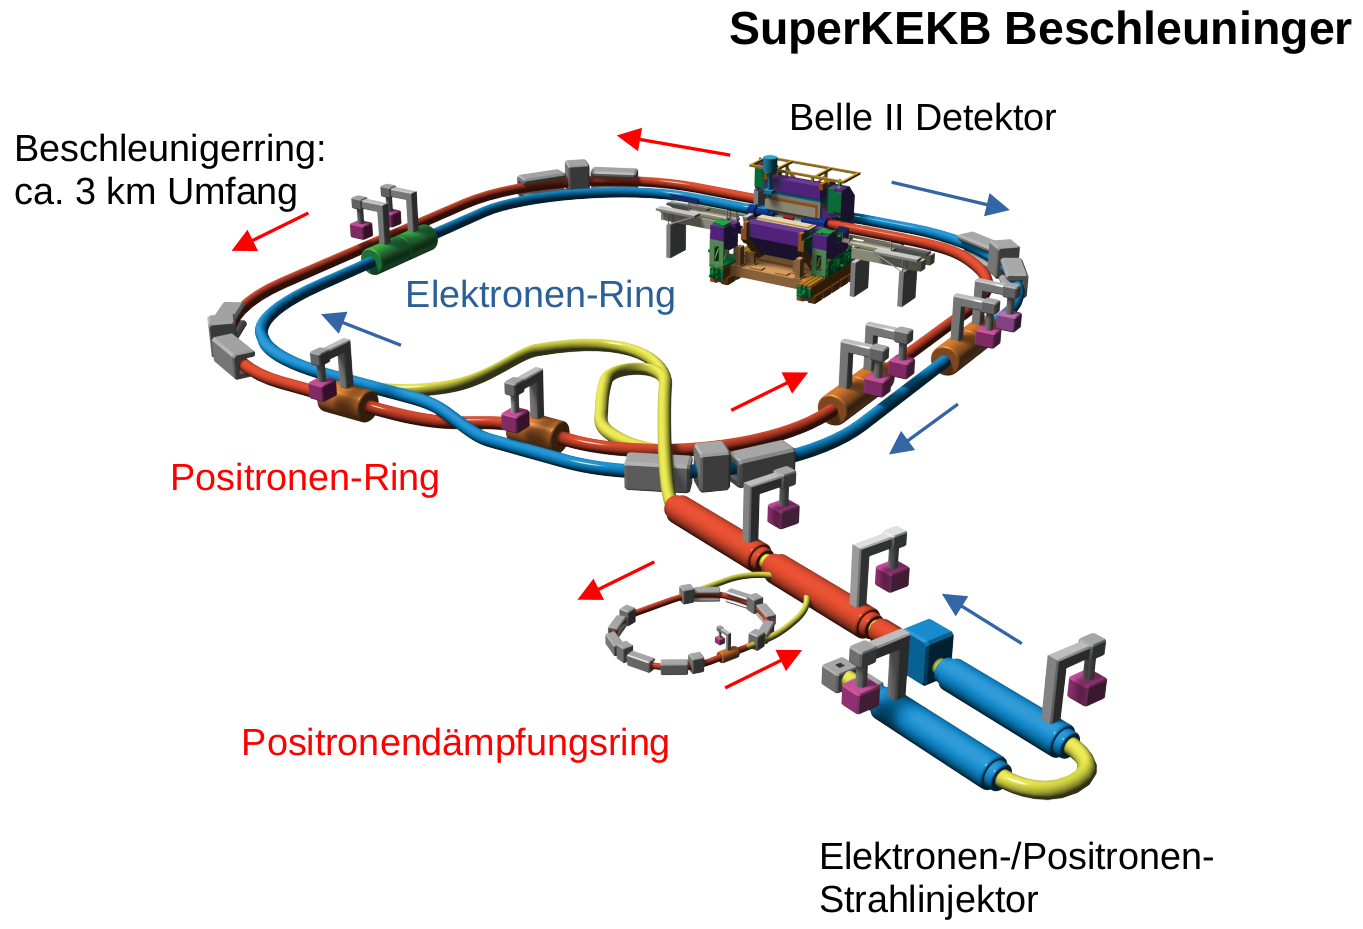
</div>

---
## 2.2 Der Detektor <a id='SubSec:detector'> </a>
---
Der Belle II Detektor besteht tatsächlich aus einer Reihe verschiedner Subdetektoren. Wobei jeder Subdetektor eine etwas andere Rolle spielt. Manche sind auf bestimmte Eigenschaften von Teilchen spezialisiert, andere sind sogar zum Aufspüren ganz bestimmter Teilchen konstruiert worden.
Über die einzelnen Komponenten kannst du dir hier eine Übersicht verschaffen:

<div>
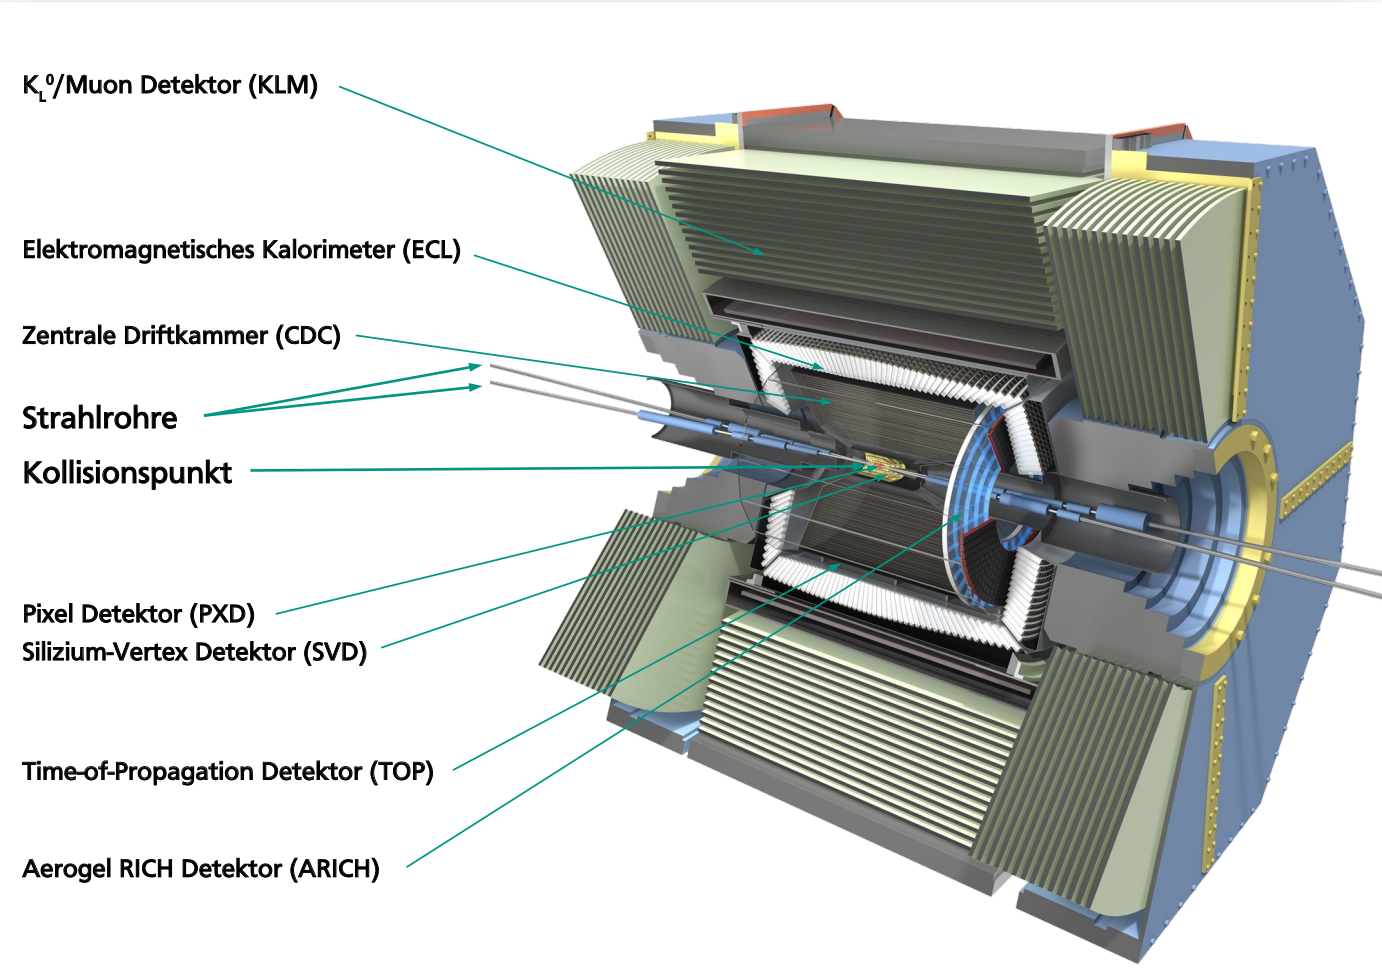
</div>

Im Zentrum des Detektors befindet sich der sogenannte Kollisionspunkt. Der Punkt also, an dem die Teilchen aufeinander treffen und miteindander reagieren.

<div class="alert alert-block alert-success">
    <strong>Spurdetektoren:</strong>
    
Als nächstes folgen die Spurendetektoren. Mit ihnen werden die Bahnen der Teilchen vermessen. Zu den Spurdetektoren gehört der Pixeldetektor mit der größten Auflösung, da er am nähsten am Interaktionspunkt ist. Als nächstes kommt der Silizium-Vertex Detektor und anschließend die Zentralen Driftkammer, die den größten Bereich abgedeckt. Leider funktionieren diese aber nur mit geladenen Teilchen, da nur diese über die elektromagnetische Wechselwirkung ein Signal auslösen. 
</div>

<strong>Teilchenidentifikation:</strong>

Die nächste Schicht bilden die Systeme zur Teilchenidentifikation. Zum einen ist das der TOP-Detektor, parallel zum Strahlrohr, zum anderen der ARICH-Detektor, der die beiden "Kappen" des tonnenförmigen Detectors abdeckt.

<div class="alert alert-block alert-success">
    <strong>Elektromagnetisches Kalorimeter:</strong>
    
Die Energie der Teilchen wird mithilfe des elektromagnetischen Kalorimeters gemessen. Die allermeisten Teilchen bleiben spätestens hier stecken und verlassen nicht den Detektor. Die wichtigsten Außnahmen hierbei sind die Muonen, die mit viel Energie nur wenig mit dem Kaloriemeter interagieren und die sogenannten $K_L^0$ (langlebige Kaonen), spezielle Teilchen, die keine Ladung haben (also sehen wir davor auch keine Spur von ihnen) und ebenfalls nur wenig mit dem Kaloriemeter interagieren.
</div>

<strong>Magnet:</strong>

Um das elektromagnetische Kalorimeter herum ist ein großer, starker Magnet (Im Bild oben braun, ohne Pfeil). Welche Rolle er genau spielt, werden wir gleich in Kapitel 3 ausführlicher diskutieren.

<strong>$K_L^0$/Muon Detektor :</strong>

Wie zuvor erwähnt interagieren Muonen mit hohen Energien nur wenig mit dem Detektor. Aus diesem Grund gibt es außerhalb des Magnetes weitere Detektorkammern. Wenn ein Teilchen hier gemessen wird wissen wir, dass es entweder ein Muon ist weil es auch eine Spur im Spurdetektor hinterlassen hat oder ein $K_L^0$, wenn keine Spur gemessen wurde.

Kombinieren wir die Information aus jedem Subdetektor, können wir rekonstruieren was für Teilchen entstanden sind.

---
## 2.3 Vereinfachter Detektoraufbau <a id='SubSec:toy detector'> </a>
---
Tatsächlich stellt das korrekte Kombinieren aller Informationen eine sehr komplizierte Aufgabe dar. Für gewöhnlich setzten wir dafür Leistungsstarke Computer und komplizierte Programme ein. Für uns soll deshalb erstmal ein einfacher Detektor reichen. 

Dabei wollen wir uns auf die beiden wichtigsten Detektoren, die $\color{orange}{\text{Spurdetektoren}}$ und das $\color{red}{\text{Kalorimeter}}$ beschränken.

Da es auch auf einem Bildschirm nicht so leicht ist, den Teilchen auf ihrer 3-dimensionalen Bahn zu folgen, betrachten wir auch nur einen Querschnitt unseres Detektors.

Ganz rechts siehst du nun einen sehr vereinfachten Detektoraufbau. Der Detektor hier besteht aus einem $\color{orange}{\text{Spurdetektor}}$, einem $\color{red}{\text{elektromagnetischen Kalorimeter}}$ und einem Magneten. 



<div>
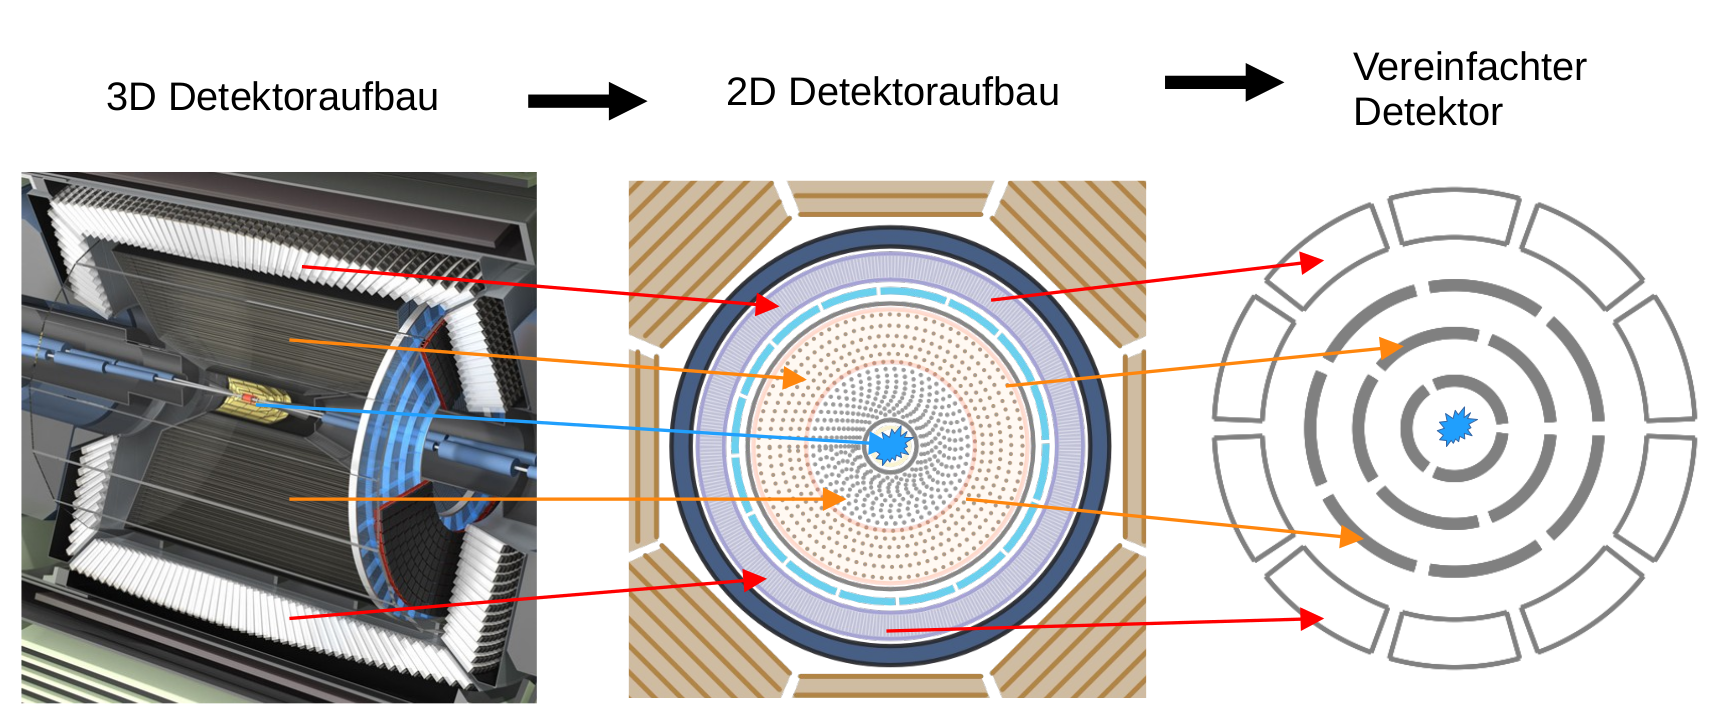
</div>

---
# 3. Teilchenspuren <a id='Sec:tracking'> </a>
---
Die ersten Detektoren, die Teilchen wahrnehmen, sind die bereits erwähnten Spurendetektoren. Während im echten Detektor gleich drei verschiedene Detektoren zum Einsatz kommen, wollen wir das an dieser Stelle auf nur einen Typen vereinfachen. 
Das soll für uns hier der Silizium-Vertex-Detektor sein.
Seine Funktionsweise kann man sich ähnlich zu einem Kamerasensor vorstellen, wie er in Handys oder Digitalkameras verwendet wird: Bewegt sich ein Teilchen durch einen der Pixel, wird ein elektrisches Signal ausgelöst, dass wir registrieren und speichern können.
Während ein Kamerasensor aber nur auf Photonen reagiert, sind unsere Sensoren nur für geladene Teilchen wie z.B. $e^-$ oder $\mu^+$ gemacht.

<div>
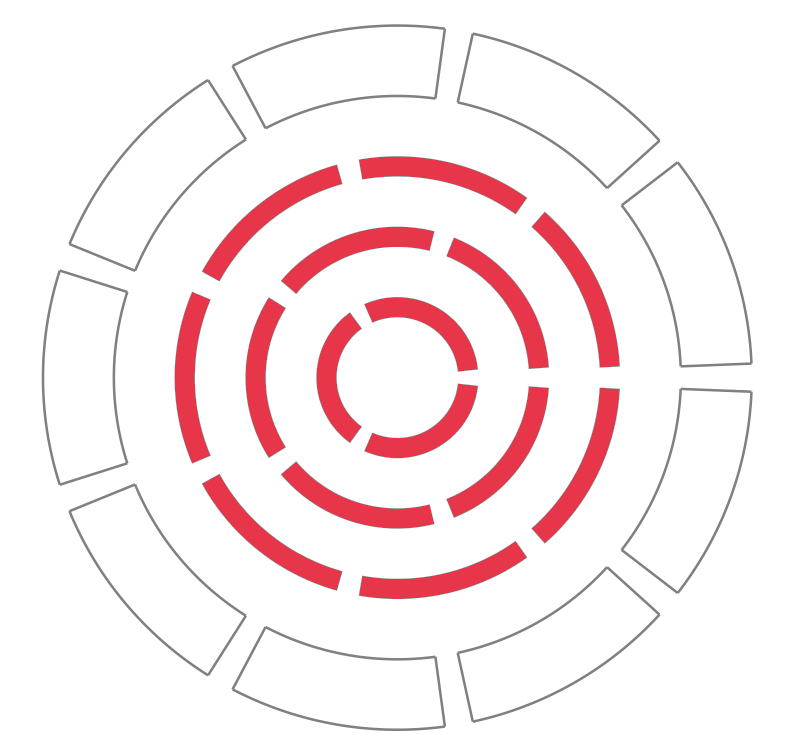
</div>


Wie du oben siehst, verwenden wir in einem Teilchendetektor aber nicht nur eine Lage Sensoren. Der echte Belle II Detektor setzt auf über 20 Lagen solcher Pixel um möglichst genau den Weg zu verfolgen, den ein Teilchen genommen hat.

Wie zuvor in den Vorträgen erwähnt, legen wir jetzt zusätzlich dazu noch ein Magnetfeld an. Mithilfe der Lorenztkraft werden die geladenen Teilchen daraufhin auf eine Kreisbahn abgelenkt.

$F_L=q \cdot (\vec{v} \times \vec{B} )$

Das ganze können wir jetzt mit der Zentripetalkraft gleichsetzen.

$F_z=m \cdot \frac{\vec{v}^2}{r}$.

$F_L = F_z$
 
Umgestellt nach dem Impuls ergibt sich:
$p=m \cdot v =r \cdot q \cdot B$

<div class="alert alert-block alert-success">
Das heißt wir können anhand des <b>Radius $r$ </b> der Teilchenbahn den <b>Impuls</b> bestimmen und mit der <b>Richtung der Krümmung</b> die <b>Ladung</b> bestimmen.
</div>


---
## 3.1 Das erste Teilchen im Testdetektor <a id='SubSec:testdetector'> </a>
---

<div class="alert alert-info">
<strong>Aufgabe:</strong>
Führe die folgende Zelle aus.
Es sollte ein Bild unseres vereinfachten Detektors erscheinen. 
Hier kannst du das Verhalten eines Teilchens in unserem vereinfachten Detektor untersuchen.
Mit dem Regler kannst du den Impuls des Teilchens vergrößern oder verringern. Das Magnetfeld lässt sich mit der Box `B-Feld` ein- und ausschalten.
Teste verschiedene Einstellungen und beantworte folgende Fragen:

1. Mit ausgeschaltetem Magnetfeld, was unterscheidet ein Teilchen mit großem Impuls von einem Teilchen mit niedrigem Impuls?
2. Mit ausgeschaltetem Magnetfeld, was unterscheidet ein Teilchen mit positiver Ladung von einem Teilchen mit negativer Ladung?
3. Mit eingeschaltetem Magnetfeld, wie verändert sich die Bahn des Teilchens von großen zu kleinen Impulsen hin? Was passiert bei sehr kleinen Impulsen?
4. Wie kann man die Ladung eines Teilchens im Detektor bestimmen?
5. Stelle den Impuls auf 0.70, schalte das B-Feld ein und wähle eine positive Ladung. Was fällt dir auf?
6. Mit eingeschaltetem B-Feld, schau dir ein Teilchen mit Impuls 2.3 an. Wechsel zwischen positiver Ladung und negativer Ladung. Ist es möglich, diese Teilchen nur anhand der von ihnen getroffenen Detektorpixel zu unterscheiden?
</div>

Output()

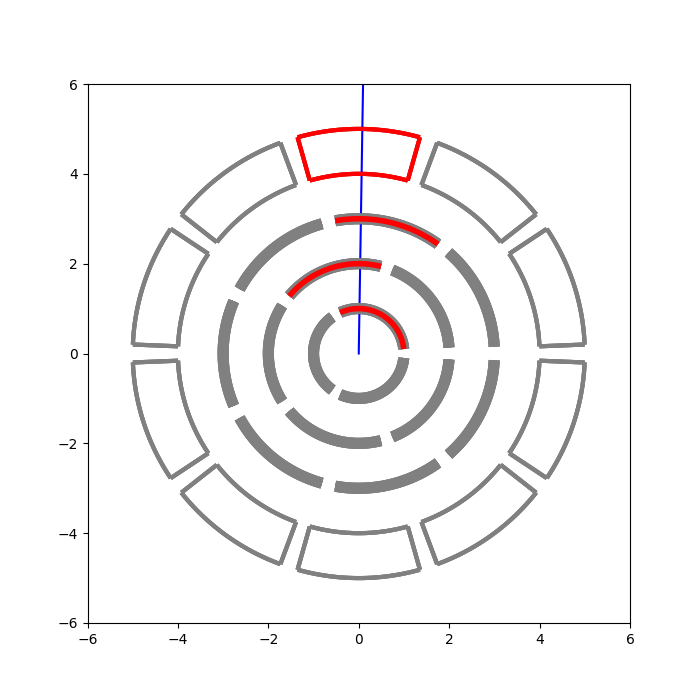

In [3]:
tw = TestDetektor(layers = 4)
tw.show()

<details>

<summary>Antwort 1 & 2:</summary>
Ohne Magnetfeld ist es nicht möglich die Ladung eines Teilchens oder seinen Impuls zu bestimmen.
</details>

<details>

<summary>Antwort 3:</summary>
Je kleiner der Impuls ist, desto kleiner ist auch der Radius der Flugkurve des Teilchens. 
Bei kleinen Impulsen ist es möglich, dass die äußeren Detektorschichten nicht erreicht werden.
Sehr kleine Impulse erreichen nichtmehr die innerste Schicht. Solche Teilchen können wir mit unserem Detektor gar nicht erst entdecken.
</details>

<details>

<summary>Antwort 4:</summary>
Positive Teilchen fliegen auf einer Kurve nach rechts, negative Teilchen auf einer Kurve nach links.
</details>

<details>

<summary>Antwort 5:</summary>
Die Flugbahn des Teilchens führt genau durch eine Lücke zwischen zwei Pixeln in der zweiten Detektorschicht.
</details>

<details>

<summary>Antwort 6:</summary>
Sowohl positiv, als auch negative geladene Teilchen verusachen ein Signal in den gleichen Detektorteilen. Es ist für den Detektor also nicht möglich diese beiden Fälle zu unterscheiden.

</details>

---
## 3.2 Detektorauflösung <a id='SubSec:resolution'> </a>
---

Wie du in Aufgabe 5 und 6 oben gesehen hast, können Teilchen obwohl sie unterschiedliche Eigenschaften haben, die gleichen Signale im Detektor hinterlassen. Diese Ungenaugkeiten nennen wir **Detektorauflösung**.

Das kannst du dir wie bei deinem Lineal vorstellen, das Millimeterstriche hat. Wenn du eine 2.4 mm langen Strich zeichnen müsstest wäre das deutlich erschwert für dich weil dein Lineal nicht genauer ist. Genauso funktioniert das mit den Detektorsegmenten.

Eine Lösung dafür ist mehr Pixel und mehr Schichten zu bauen. Das sind allerdings teuer, verbraucht Platz für mehr Kabel und benötigt mehr Strom, d.h. wir haben mehr Zwischenräume in denen wir nichts messen können oder brauchen sehr viel Platz weil der Detektor sehr groß wird. Wir müssen also einen Kompromiss finden wenn wir den Detektor bauen. 
Deswegen hat der Belle II Detektor auch drei verschiedene Spurdetektoren. Nach außen hin werden günstigere und größere Detektoren eingesetzt, die aber oft auch weniger genau sind.

<div class="alert alert-info">
<strong>Aufgabe:</strong>
    
Für unseren vereinfachten Detektor, kannst du dir unten unterschiedliche Anzahl an Schichten anschauen.
Wiederhole die Aufgaben 5 & 6 aus der vorherigen Aufgabe. Kannst du jetzt Unterschiede feststellen?
Du kannst dir auch unterschiedliche Anzahl an Schichten anschauen. Ändere dazu einfach die Zahl in `layers = 10` und führe die Zelle erneut aus.
</div>

Output()

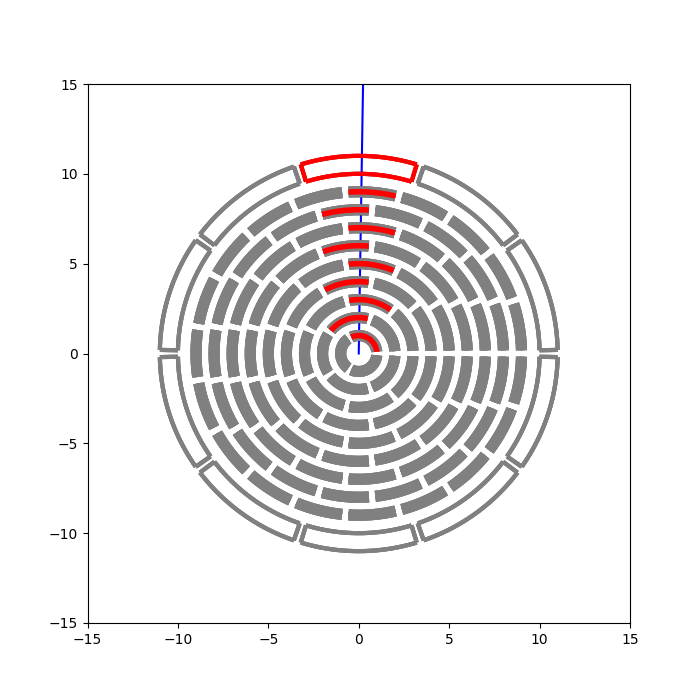

In [4]:
tw = TestDetektor(layers = 10)
tw.show()

---
## 3.3 Rekonstruieren einer Teilchenspur <a id='SubSec:noise'> </a>
---

Wir haben uns nun angeschaut, wie sich ein uns bekanntes Teilchen verhält, wenn es sich durch unseren Detektor bewegt. Jetzt wollen wir dieses Wissen anwenden um aus den Signalen unseres Detektors die Flugbahn eines uns bisher unbekannten Teilchens zu rekonstruieren.

Bisher haben wir uns nur angeschaut, dass ein Teilchen in eine Richtung wegfliegt. Tatsächlich können Teilchen natürlich in alle möglichen Richtung wegfliegen. Dafür müssen wir neben dem Impuls noch den Winkel $\phi$ bestimmen. Dafür verwenden wir die einheit *rad*. Bei ihr entspricht ein halber Kreis dem Wert $\pi$.

<div>
<img src="figures/Polarkoordinaten.png" width="300"/>
</div>

<div class="alert alert-info">
<strong>Aufgabe:</strong>
    
Führe die Zelle unten aus.
Du siehst wieder unseren vereinfachten Detektor.
Zusätzlich hast du zwei Regler um die Teilchenspur zu bestimmen. 
Mit $p_T$ kannst du den Impuls fest legen. Mit $\phi$ kannst du den Winkel bestimmen, indem das Teilchen wegfliegt.
Außerdem kannst du wieder festlegen, ob die Ladung positiv oder negativ ist.
Finde den passenden Winkel und Impuls, der der angezeigten Spur entspricht.
Detektorteile, die durch die das rekonstruierte Teilchen getroffen werden, werden blau eingefärbt. Hast du die richtigen Einstellungen gefunden, sollten die roten Detektorsignale mit den Blauen übereinstimmen.
Du kannst deine Lösung mit dem ursprünglichen Teilchen vergleichen, indem du auf `Zeige wahres Teilchen` klickst.
</div>

Output()

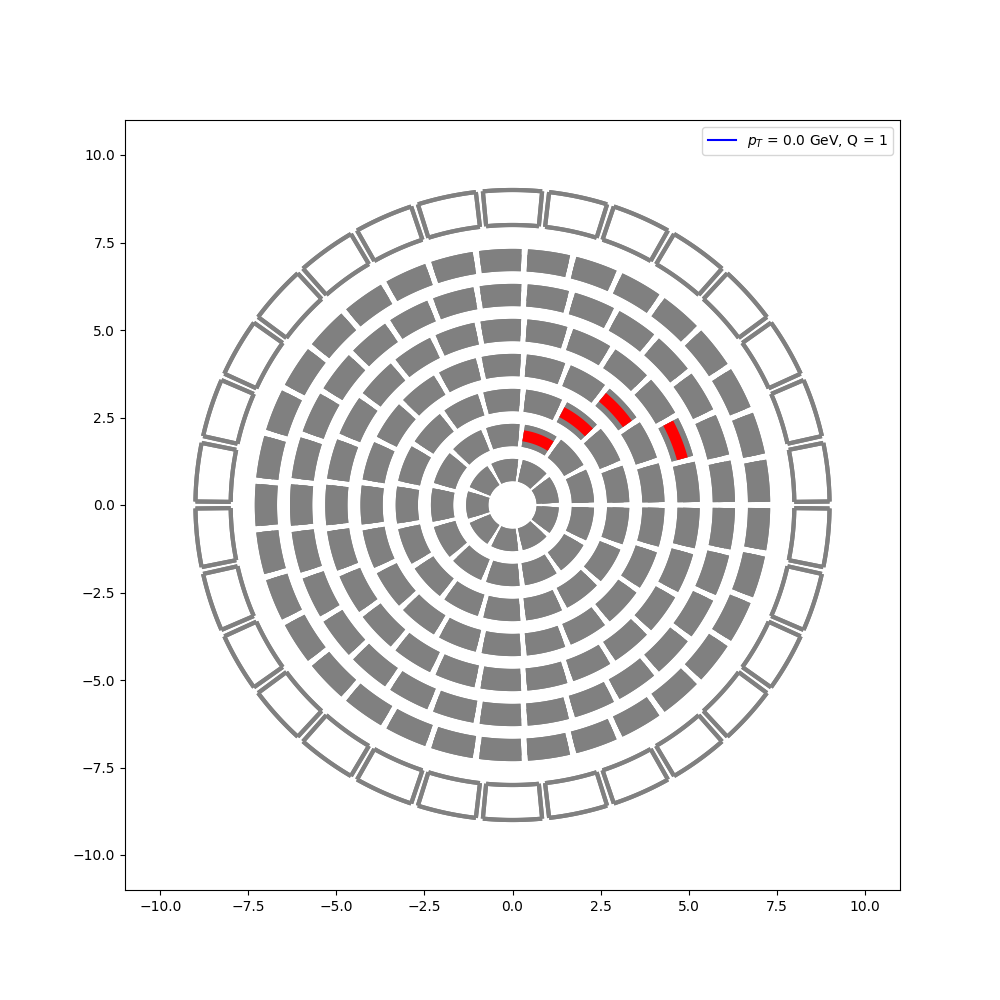

In [5]:
tw=TrackingWidget('events/single_track.h5', noise = 0, show_truthbutton = True)
tw.show()

---
## 3.3 Detektorrauschen <a id='SubSec:noise'> </a>
---

Leider ist unsere Detektor in Wirklichkeit nicht so schön klar, wie es in der Aufgaben oben dargestellt ist. Einzelne Detektorteile können auch zufällig falsche Signal geben und erschweren uns damit die Arbeit.

Vermutlich kennst du soetwas von Bildern, besonders, wenn sie im Dunkeln gemacht wurden. Es gibt ein **Rauschen**, das das Bild unschärfer macht und es schwerer macht, feinere Strukturen zu erkennen.


<div>
<img src="figures/Bildrauschen.jpg" width="300"/>
</div>

Genau das gleiche kann auch hier bei dem Spurdetektor passieren. 

<div class="alert alert-block alert-success">
So wie bei dem Kamerasensor ein Element auf einmal etwas anzeigt was es gar nicht gemessen hat, kann auch hier ein elektrischer Impuls entstehen ohne dass ein Teilchen von unserer Kollision durch das Detektorsegment ist. Dies erschwert es uns natürlich die Teilchenspuren zu finden.
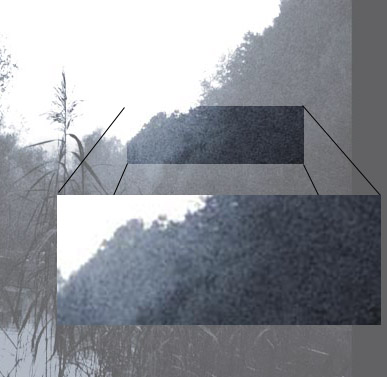

Hier siehst du ein Beispiel von Detektorrauschen. Auf der linken Seite sind die $\color{blue}{\text{Signale}}$, die von dem eigentlichen Teilchen $\color{blue}{\text{blau}}$ eingefärbt und das $\color{red}{\text{Detektorrauschen rot}}$. Allerdings ist das einzige was man sieht die Aufnahme, das heißt das Bild auf der rechten Seite. Es ist nun deutlich schwerer zu unterscheiden welche Hits zu dem Teilche gehören und welche einfach nur Rauschen sind.



<div>
<img src="figures/NoiseComparison.png" width="900"/>
</div>
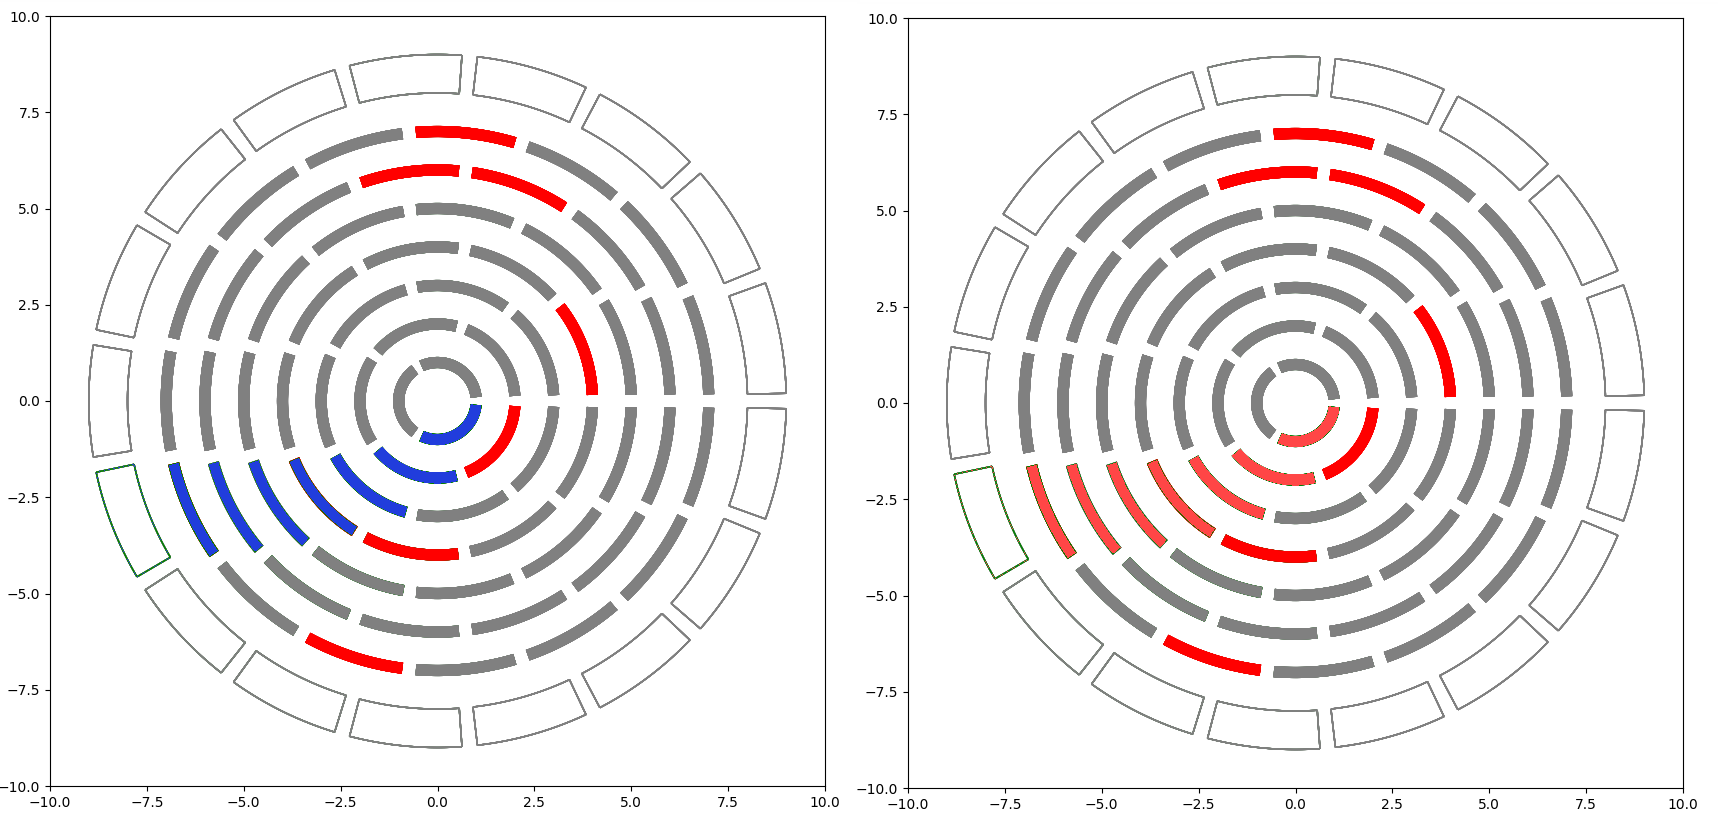

<div class="alert alert-info">
<strong>Aufgabe:</strong>
    
Wir wiederholen die vorherige Aufgabe. Jetzt aber mit der zusätzlichen Schwierigkeit, dass der Detektor auch rauscht, also nicht alle Signale auch zu unserem Teilchen gehören.

Bestimme wieder Impuls, Winkel und Ladung des Teilchens.
    
Du kannst mit Hilfe des Buttons `Zeige wahres Teilchen` dein Ergebnis kontrolieren.

Output()

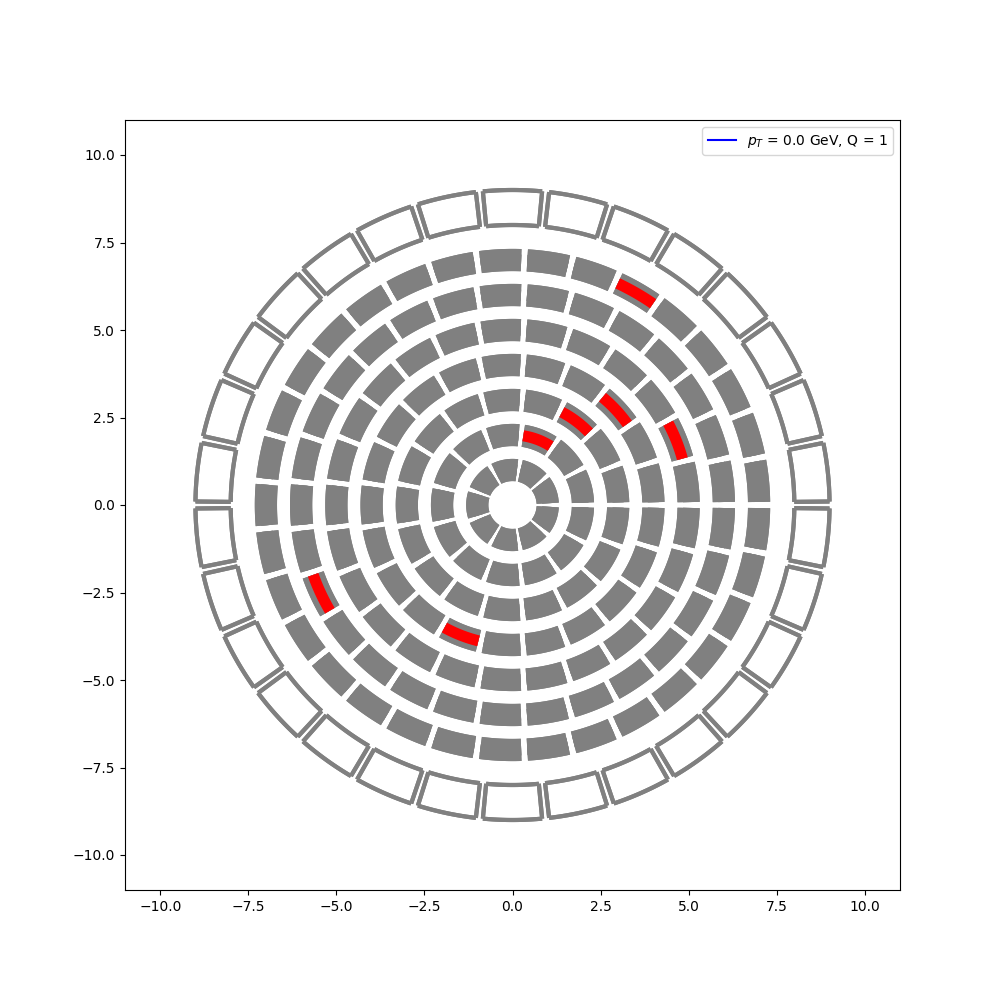

In [6]:
tw=TrackingWidget('events/single_track.h5', show_truthbutton = True)
tw.show()

---
# 4. Elektromagnetisches Kalorimeter <a id='Sec:ECL'> </a>
---
Der zweite Subdetektor von unserem vereinfachten Detektor ist das Elektromagnetische Kalorimeter, auch ECL in Belle II genannt.
Er besteht aus einer Vielzahl an Kristallen, die die Energie von Teilchen messen die mit der elektromagnetischen Kraft wechselwirken. 
Diese Kristalle sind um den Spurdetektor herum angebracht, um den ganzen Bereich abzudecken.
<div>
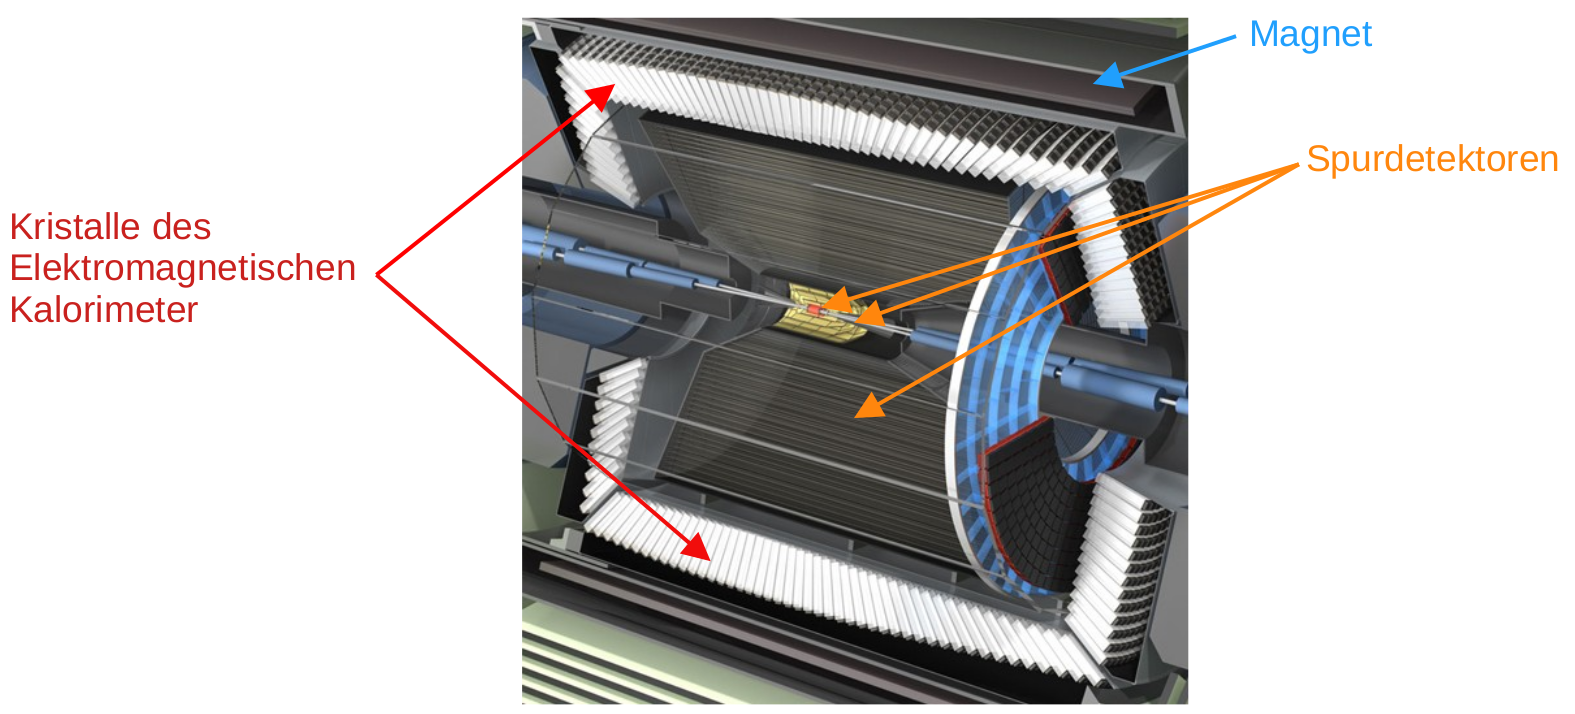
</div>


<div class="alert alert-block alert-success">
Anhand der Teilchenspur können wir den Impuls und die Ladung des Teilchens bestimmen. 
Wissen wir zusätzlich die Energie der Teilchen, können wir mit der relativistischen Energie-Impuls Erhaltung die Masse berechnen:

$E^2-\vec{p}^2=m^2$
    
</div>

Damit wissen wir die Masse und Ladung können wir das Teilchen identifizieren:

|Teilchenname |Masse | Ladung |
| :- | -: | :-: |
|Elektron | 0,511 MeV | -1 |
|Positron | 0,511 MeV |+1 |
|Muon | 105 MeV | -1 |
|Antimuon | 105 MeV | +1 |
|Tau | 1776 MeV | -1 |
|Antitau | 1776 MeV | +1 |
|Proton | 938,3 MeV | +1 |
|Antiproton | 938,3 MeV | -1 |
|neutrales Pion | 135 MeV | 0 |
|positives Pion | 139,6 MeV | +1 |
|negatives Pion | 139,6 MeV | -1 |

---
## 4.1 Energiemessung <a id='SubSec:Energie'> </a>
---
Das elektromagnetische Kalorimeter misst die Energie in Form von Schauern. Wenn ein hochenergetisches Teilchen in einen Kristall fliegt, werden über die elektromagnetische Wechselwirkung Photonen abgestrahlt, die daraufhin wieder in Elektronen und Positronen konvertiert werden. Innerhalb des Kristalls wird also eine "Lawine" aus immer mehr Teilchen ausgelöst, bis diese nicht mehr genug Energie haben. 

<div>
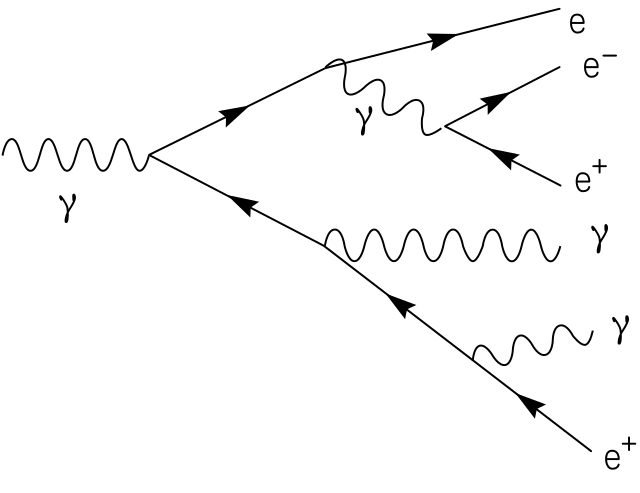
</div>

In dem Kristall sieht das ganze dann so aus:

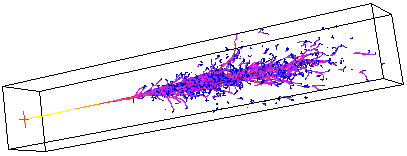

Rekonstruiert man den Schauer, weiß man wieviel Energie das Teilchen hatte. 

Schauern die Teilchen auf, kann es sein dass der Radius des Schauers breiter ist als ein Kristall. Der Schauer breitet sich auf die umliegenden Kristalle aus. Für die Energierekonstruktion müssen wir also alle dem Schauer zugehörigen Kristalle kombinieren um so die Gesamtenergie des Teilchens zu bestimmen.  

<div class="alert alert-info">    
<strong>Aufgabe:</strong>
    
Bestimme die Energie des Teilchens, indem du das Energiecluster des Teilchens markierst.

<div class="alert alert-warning">
<strong>Hinweis:</strong>
    
Hier siehst du den Zylinder des elektromagnetische Kalorimeters ausgerollt. 
    
Die Energie pro Kristall ist mit den Farben codiert, je stärker ein Kristall $\color{red}{\text{rot}}$ leuchtet desto mehr Energie wurde in dem Kristall deponiert. Ist der Kristall grau eingefärbt, hat er wie zuvor nichts gemessen. Umrande die Kristalle, die deiner Meinung nach zu dem Cluster gehören.

Output()

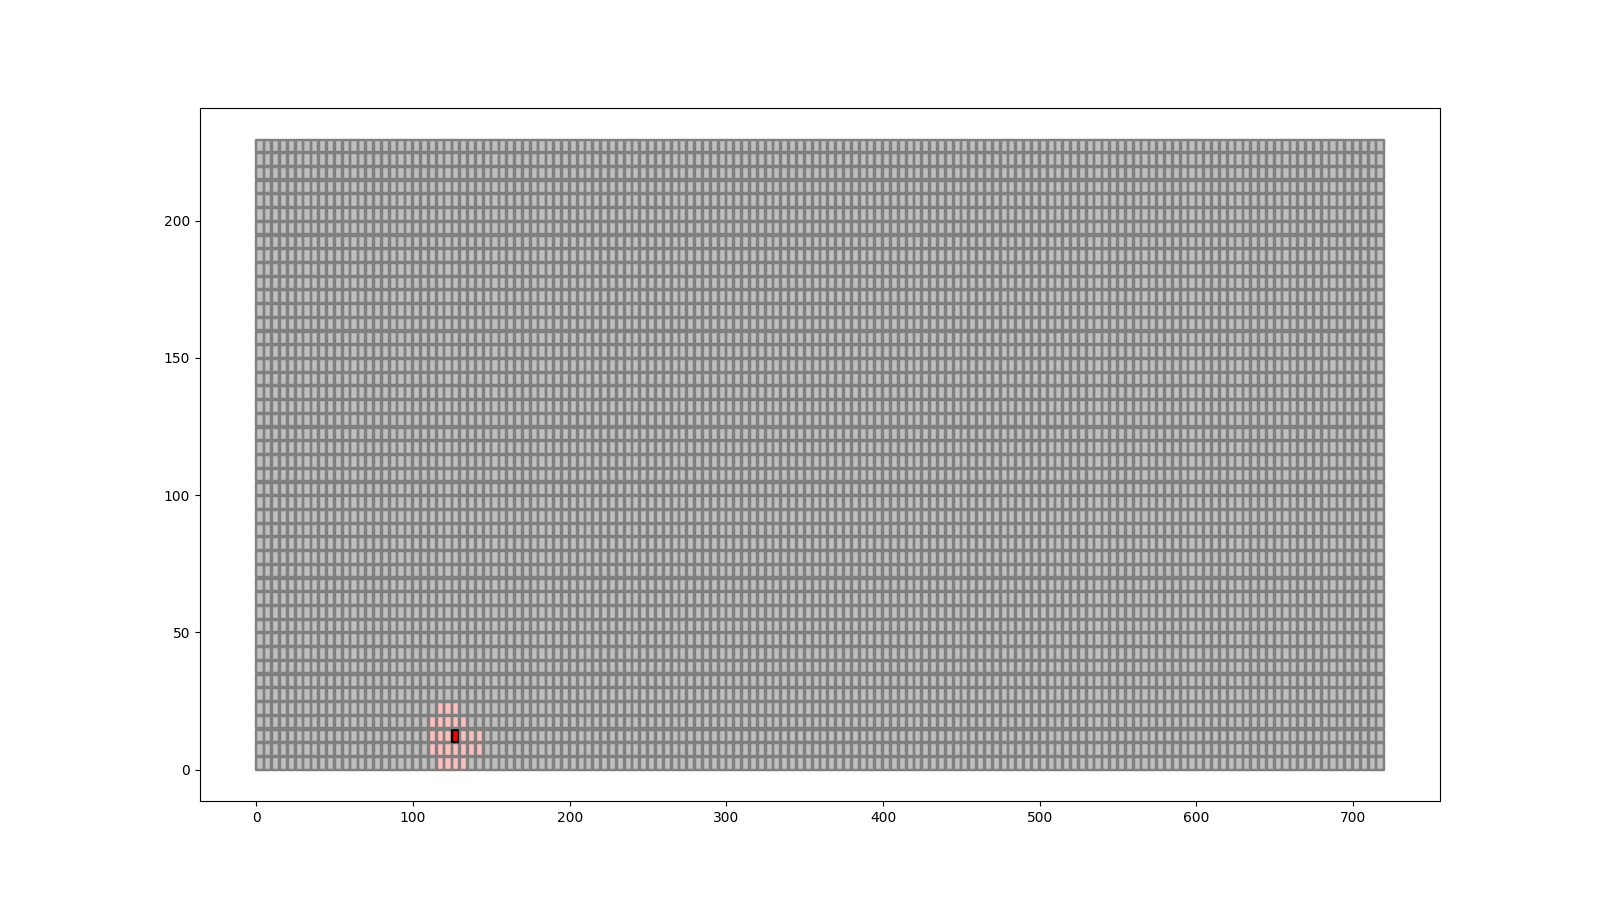

In [7]:
ew = ECLWidget('barrel/electron.h5', noise_rate = 0.00, )
ew.show()

---
## 4.1 Teilchenidentifikation <a id='SubSec:Energie'> </a>
---
Das Energiecluster unterscheidet sich für die verschiedenen Teilchenarten.
Diese Signatur kann ebenfalls verwendet werden, um Teilchen zu identifizieren.
<div class="alert alert-info">    
<strong>Aufgabe:</strong>
        
Du kannst dir im folgenden die verschiedenen Teilchen anschauen um dich mit den Signaturen vertraut zu machen.


<div class="alert alert-warning">
<strong>Hinweis:</strong>
    
Im folgenden siehst du die Energiedeposition für ein Positron.

Output()

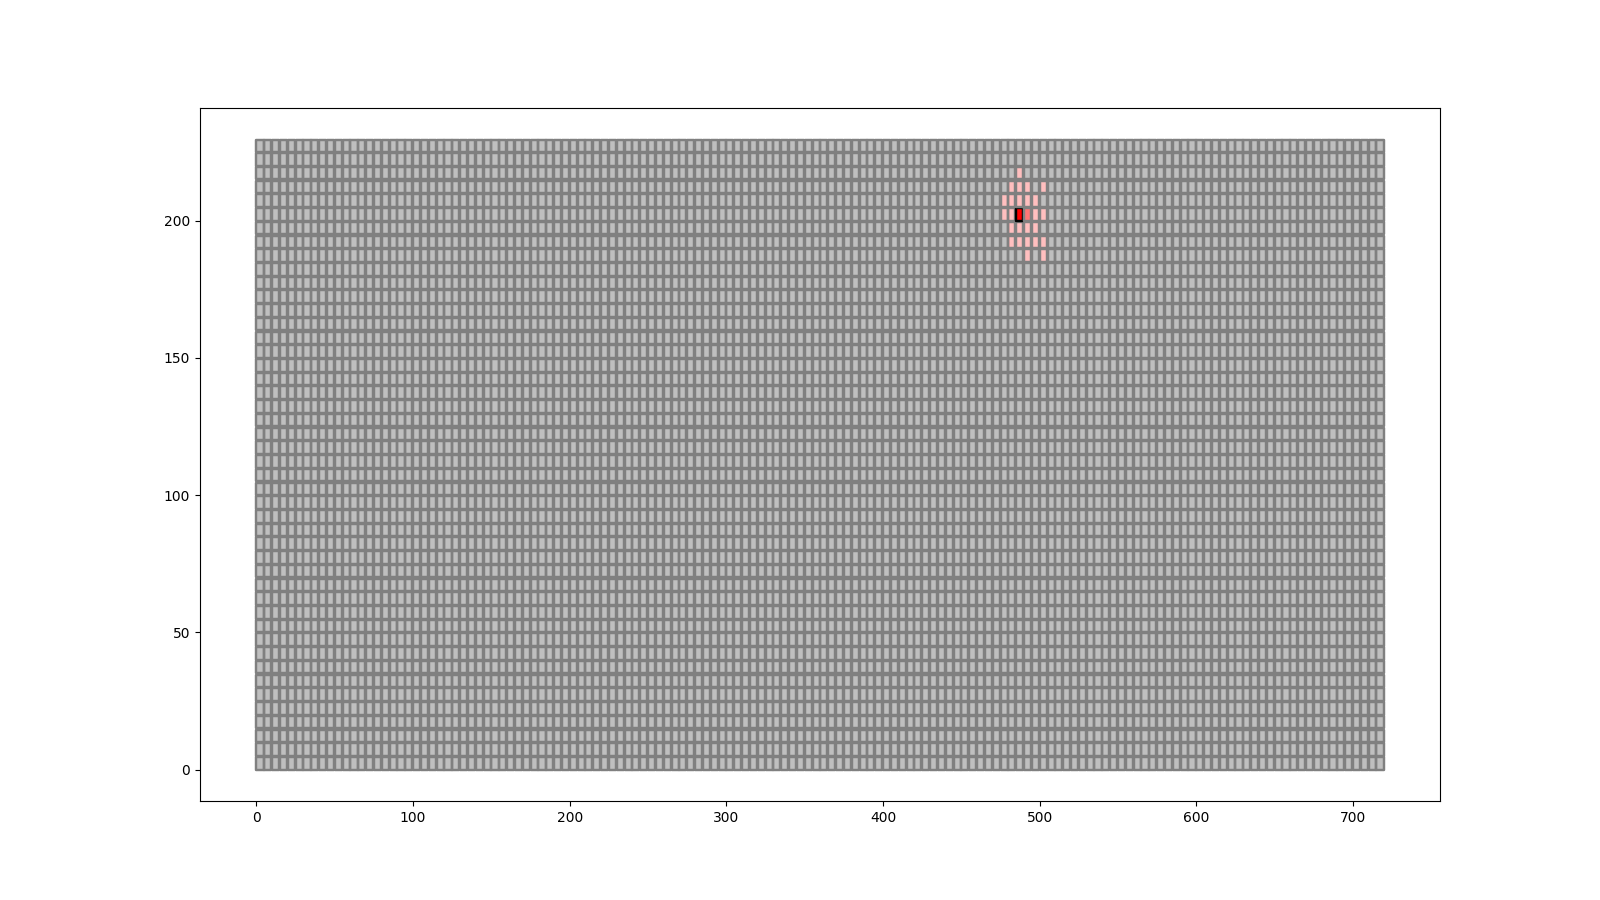

In [8]:
ew = ECLWidget('barrel/positron.h5', noise_rate = 0.00, )
ew.show()

<div class="alert alert-warning">
<strong>Hinweis:</strong>
    
Hier siehst du die Energiedeposition für den Fall eines Muons.

Output()

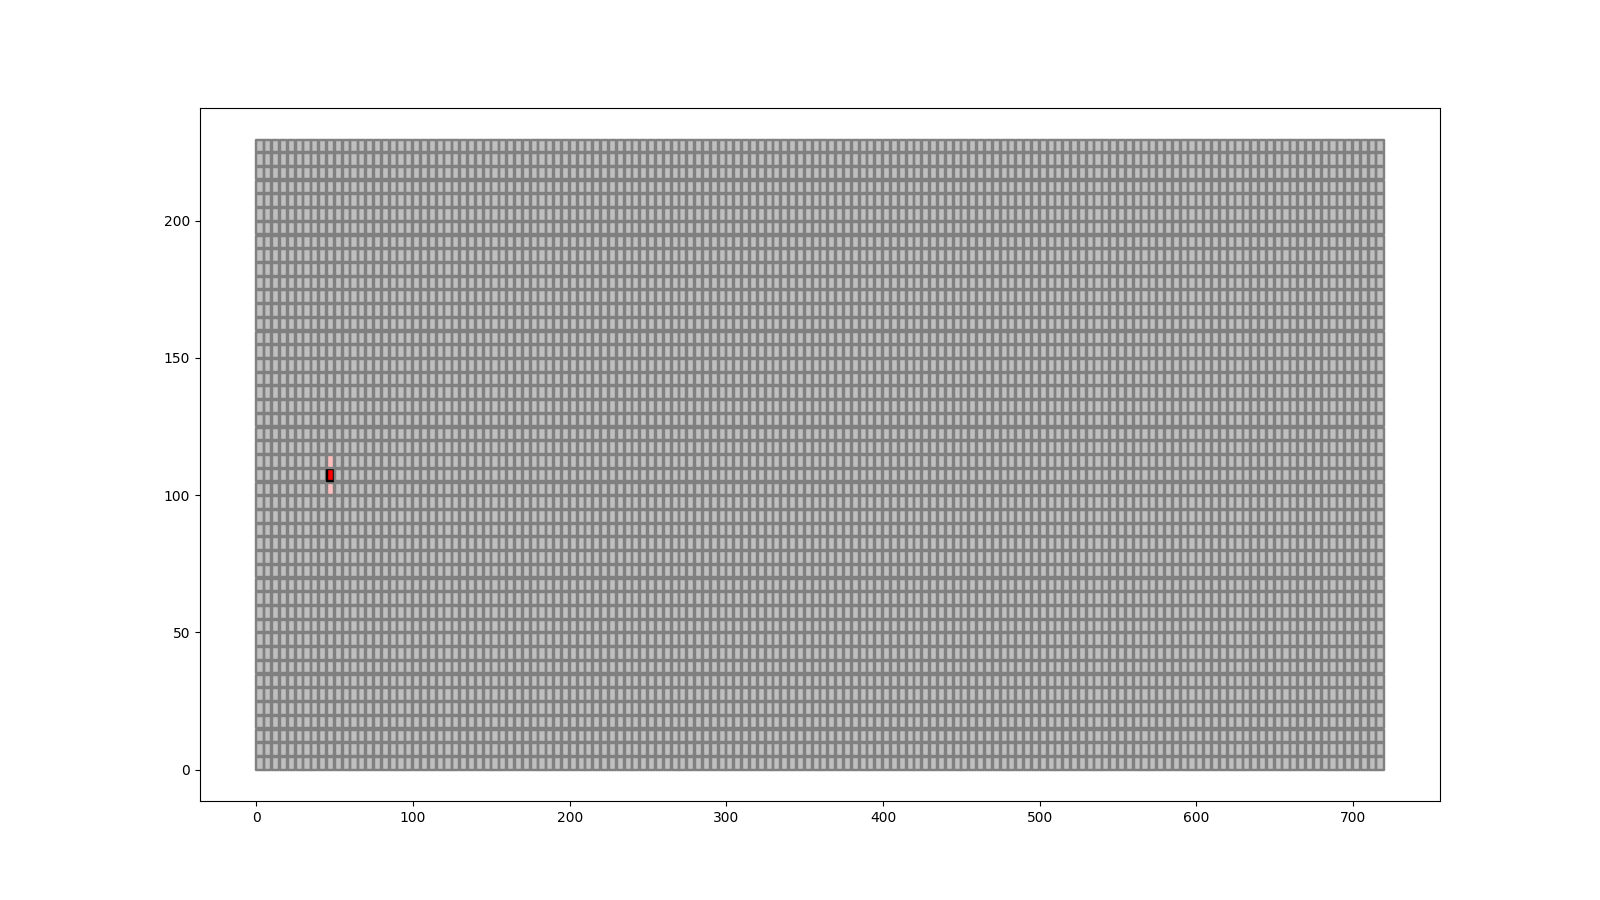

In [9]:
ew = ECLWidget('barrel/muon.h5', noise_rate = 0.00, )
ew.show()

<div class="alert alert-warning">
<strong>Hinweis:</strong>
    
Dies ist die Energiedeposition für ein Pion.

Output()

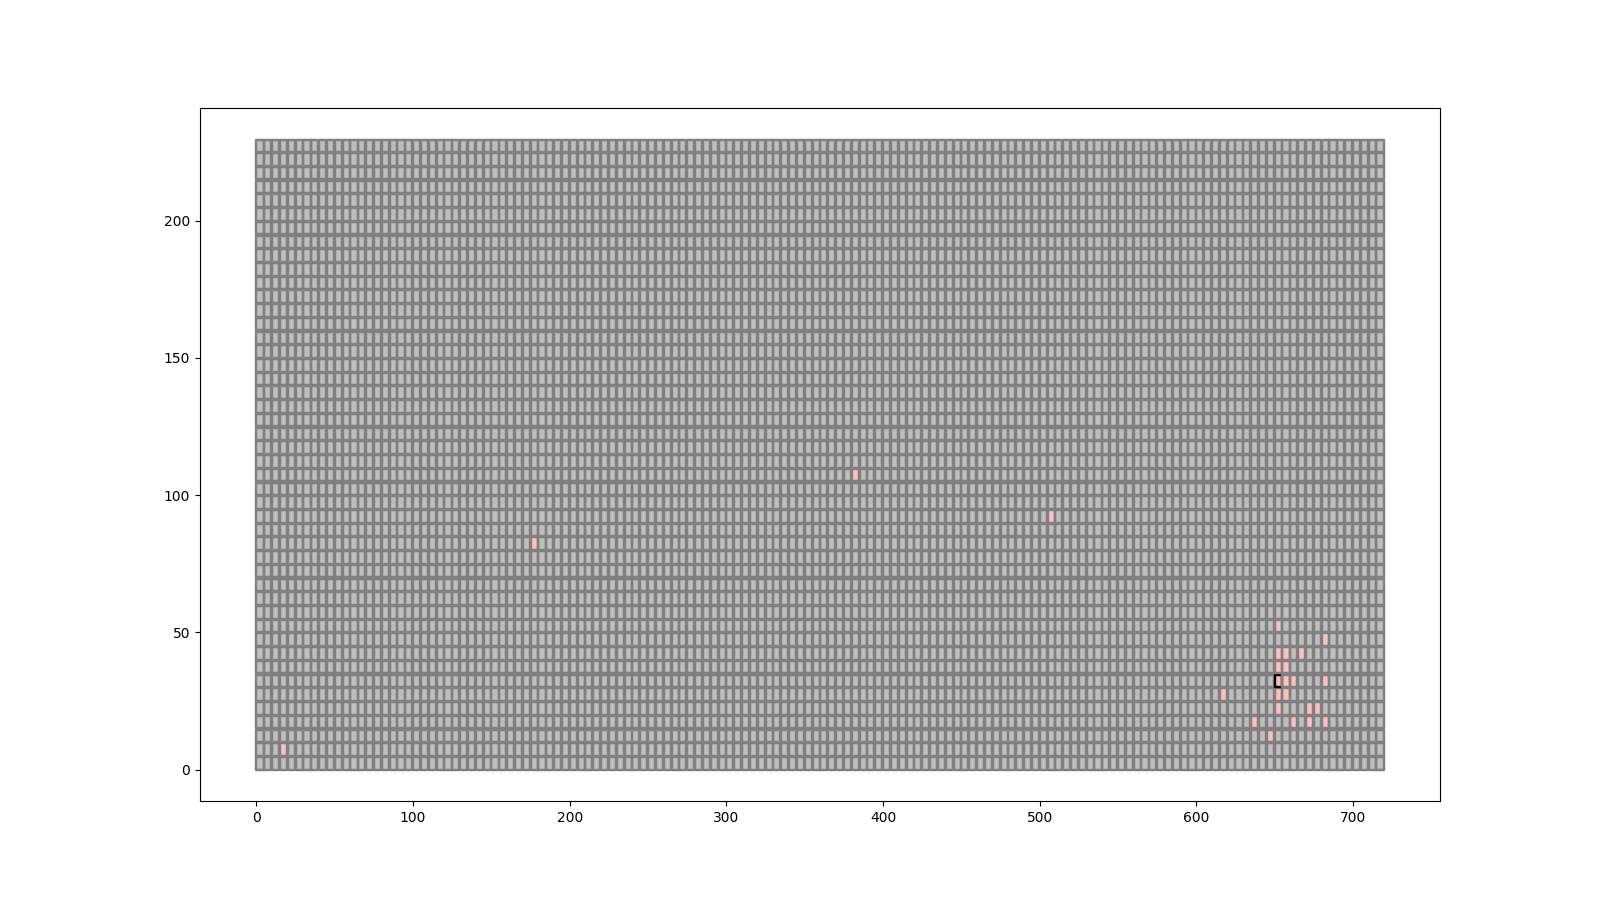

In [10]:
ew = ECLWidget('barrel/pion.h5', noise_rate = 0.00, )
ew.show()

---
Man erkennt einen deutlichen Unterschied zwischen den verschiedenen Teilchen:

<div>
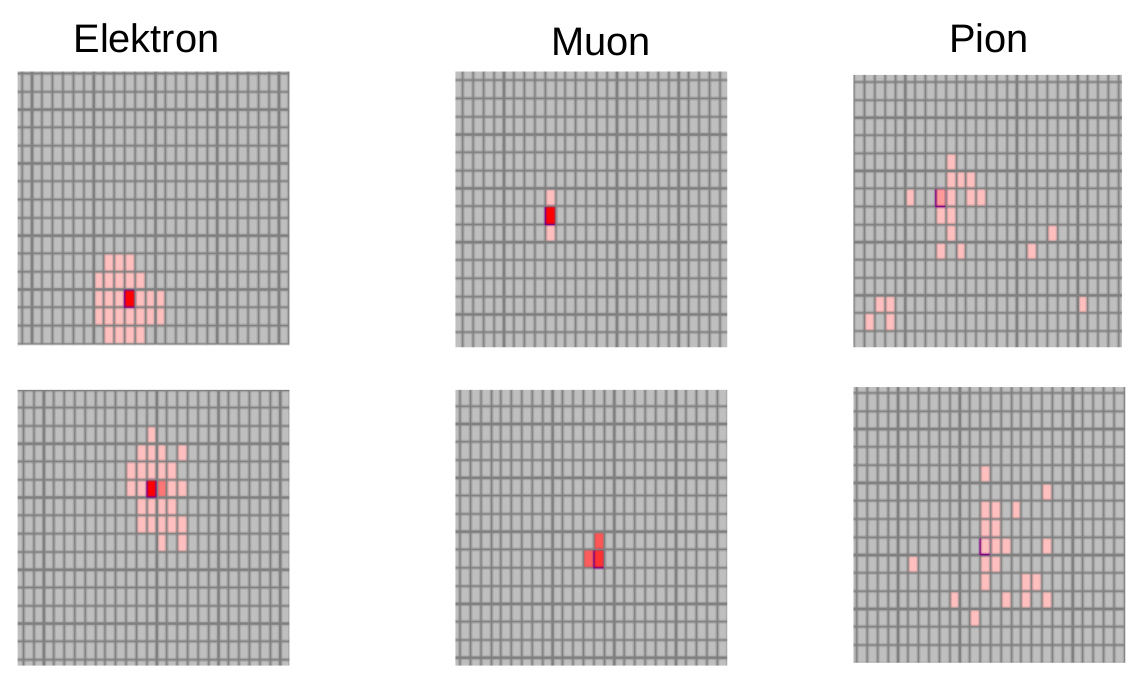
</div>

<div class="alert alert-block alert-success">

Das <strong>Positron </strong>, wie das <strong>Elektron</strong>, interagiert wenn es auf einen Kristall im elektromagnetischen Kalorimeter trifft. Es schauert daraufhin breit auf, so dass auch in den umliegenden Kristallen Energiedeposition gemessen wird. Dadurch gibt es einen Kristall in der Mitte mit viel Energie und in den umliegenden Kristallen ist weniger Energie.

Das <strong>Muon</strong> hingegen hat einen sehr schmalen Schauer, es gibt wenig Kristalle in denen die Energie deponiert wird.

Das <strong>Pion</strong> kann schon vor dem elektromagnetischen Kalorimeter aufschauern. Der Schauer des Pions ist auch sehr breit verteilt. Aus diesem Grund ist die Energiedeposition sehr stark verteilt, und im Gegensatz zu den Elektronen bei denen die Cluster kreisförmig sind ist die Energie hier sehr verteilt.

---
## 4.2 ECL-Detektorrauschen <a id='SubSec:ECLnoise'> </a>
---
Wie auch beim Spurdetektor gibt es auch beim elektormagnetischen Kalorimeter Rauschen, was es uns erschwert die Energie zu messen.

<div class="alert alert-info">    
<strong>Aufgabe:</strong>
        
Bestimme die Art und Energie der 2 Teilchen bei Detektorrauschen.

<div class="alert alert-warning">
<strong>Hinweis:</strong>

Um den Cluster für das nächste Teilchen auszuwählen, kannst du hier das Dropdown-Menu nutzen. Bereits ausgewählte Cluster werden als Erinnerung wieder gelb eingefärbt.

Output()

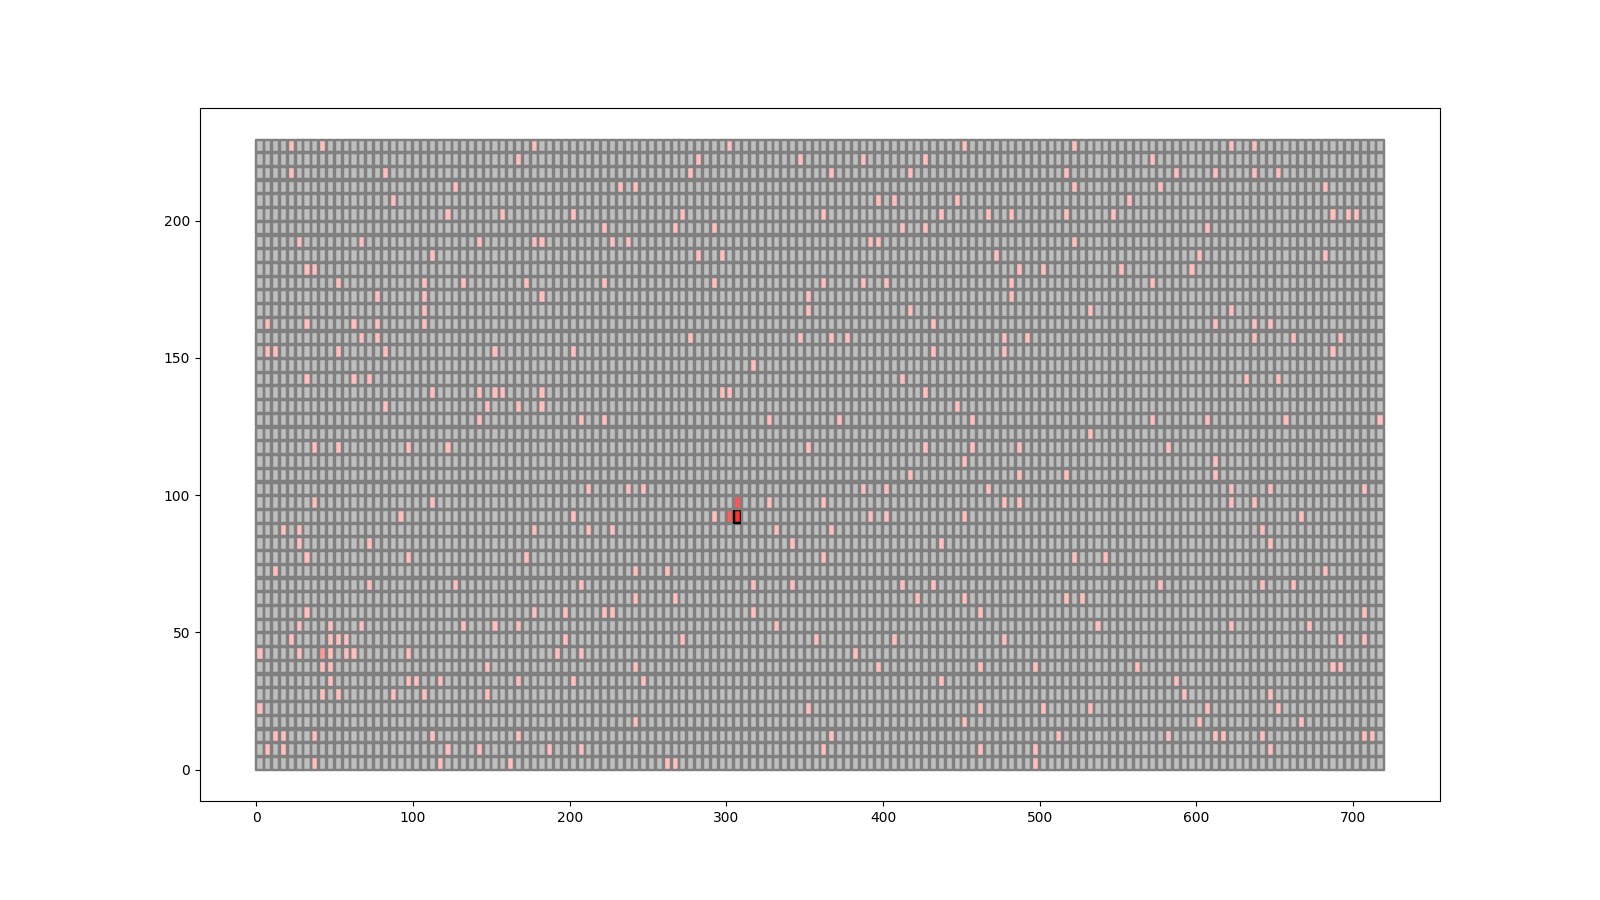

In [12]:
ew = ECLWidget('barrel/ECLnoise.h5', noise_rate = 0.05)
ew.show()

Weitere Effekte die die Energiemessung erschweren ist die Länge der Kristalle. So kann es passieren dass die Länge des Schauers größer ist als die Länge unserer Kristalle. Dass heißt es leckt aus Kristall und wir können die Energie nicht komplett messen.

Das ist auch der Fall bei Muonen, die nicht genug interagieren und wir nur einen sehr kleinen Anteil der Energie messen. Diese fliegen die bei hohen Energien einfach durch den Detektor durch und verlieren dabei nur wenig Energie. Um Muonen zu messen gibt es nach dem Magneten nochmal Muonenkammern. Kombiniert man die Information aus allen Detektoren, kann man so vorhersagen um welches Teilchen es sich handelt und damit auch die Energie berechnen (da man in diesem Fall die Masse kennt). 


In unserem vereinfachten Fall sind unsere Kristalle ausreichend lang um die Energien der Teilchen messen zu können.

# 5. Zusammenfassung

In diesem Notebook hast du eine Einführung bekommen, wie wir in der Teilchenphysik geladene Teilchen rekonstruieren und identifizieren können. Dafür haben wir erst einen Spurdetektor um unseren Kollisionspunkt herum, der die Bahn der Teilchen misst. Anschließend wird die Energie der Teilchen gemessen.

<div class="alert alert-info">    
Öffne nun bitte das Notebook `Introduction_To_Event_Interpretation.ipynb`, um ein Ereignis mit zwei Teilchen zu rekonstruieren.